# HOW TO GENERATE A CUSTOMIZED WORDCLOUD FIGURE IN PYTHON

I have always found wordclouds quite amazing tools for visualization and dissemination. There are several available online tools to geenrate wordclouds (see for example https://www.wordclouds.com/). While these tools work generally fine, I wanted to be able to come up with a more tailored and customizable way of producing a wordcloud. In this short tutorial, I will show a Python procedure based on the ```wordcloud``` package. Of course, I am still experiencing some limitations in the final product, and hence suggestions for improvement are highly appreciated (in case, feel free to reach out to me at a.bombelli@tudelft.nl).

To have a meaningful wordcloud, we wil ldo the following:

* From Scopus, we have downloaded a list of academic papers (journal papers, conference papers, books) satisfying the following conditions in the abstract, title, or keywords: (TITLE-ABS-KEY(( "air transport"  OR  aviation  OR  airports  OR  airlines )  AND  (sustainability OR sustainable)). In princple, we are interested in papers dealing with sustainability in aviation
* We will use all the words in the abstracts of such academic papers to generate out set of words (with some filtering)
* We will use such set to generate our wordcloud. Since we are dealing with aviation, we will be generating our wordcloud in the shape of an aircraft
* As an extra, we will also use some extra information retrieved from Scopus to analyze some trends in the academic literature pertaining sustainability in aviation

In [ ]:
"""
Created on Wed Jan 18 11:26:44 2023

@author: abombelli
"""

import numpy as np
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from collections import Counter
from nltk.corpus import stopwords

We initially close all Figures, set a random seed (just in case), and set to path to the current working directory

In [5]:
plt.close('all')

# Set random seed
random.seed(42)
# Get path to current folder
cwd = os.getcwd()

We now load the .csv file with all the papers we selected from Scopus

In [6]:
# Load papers
# ( ( "air transport"  OR  aviation  OR  airports  OR  airlines )  AND  (sustainability OR sustainable) 
df_scopus = pd.read_csv(os.path.join(cwd,'scopus.csv'))
all_abstracts = [row.Abstract for idx,row in df_scopus.iterrows()]

We now generate a list of hard-coded stopwords. These are words that we want to eliminate from our final set of words, on top of the default ones. Tehre is no perfect piece of advice here. The best option is some trial and error.

In [7]:
custom_stopwords = ["sustainability","sustainable","air","airport","airports",
"airline","airlines","Airport","Airports","Airline","Airlines","aviation",
"Aviation","transport","using","may","new","study","within","must","one",
"two","three","well","the","and","The","use","used","based","This","this",
"rights reserved","number","author","ISO","need","case","However","Elsevier",
"Wiley","Springer","paper","all","All","including","B.V.","well","one",
"provide","many"]

We now add our customized list of stopwords to the one obtained from the ```wordcloud``` package

In [8]:
all_stopwords = custom_stopwords+list(STOPWORDS)

We now store all words from our abstracts, get rid of some punctuation, of very short words and of all stopwords. An an extra precaution, we also use stopwords from the ```nltk``` package. Note: the code below will take a while to run. We also create a dictionary with all words and their count, to keep track of the most popular ones 

In [9]:
text = []
for abstract in all_abstracts:
    idx_space   = [pos for pos, char in enumerate(abstract) if char == " " ]
    text.append(abstract[0:idx_space[0]])
    for i in range(0,len(idx_space)):
        # All words in the current abstract, but the last one
        if i != len(idx_space)-1:
            text.append(abstract[idx_space[i]+1:idx_space[i+1]])
        # Last one
        else:
            text.append(abstract[idx_space[i]+1:])
            
text = [item.replace(",","") for item in text]
text = [item.replace("'","") for item in text]
text = [item.replace(":","") for item in text]
text = [item.replace(".","") for item in text]

text_filtered      = [item for item in text if len(item)>2 and item not in stopwords.words("english")
                      and item not in all_stopwords]

word_count_dict = dict(Counter(text_filtered))
popular_words   = sorted(word_count_dict, key = word_count_dict.get, reverse = True)


Now we load our figure. In this case, it is a white aircraft surrounded by a black circle, surrounded by a white square. We can to generate our wordcloud in the two white areas. We hence identify the black area (mask==0) and assign it a value equal to 255 to pretend it is white actually, as this is a requirement for the ```wordcloud``` package. ```wordcloud``` will draw words in positions where the image is not white. In the resulting array, 255 is white, and 1 is black. We also load the font we want to use for our wordcloud 

In [13]:
mask      = np.array(Image.open(os.path.join(cwd,"ac.png")))
mask2     = np.where(mask==0, 255, mask)
font_path = os.path.join(cwd,"Comfortaa-Bold.ttf")

We now create our wordcloud using some of the features we created and tweaked. We specify the font, the background color, the colormap, the size of the wordcloud, etc.

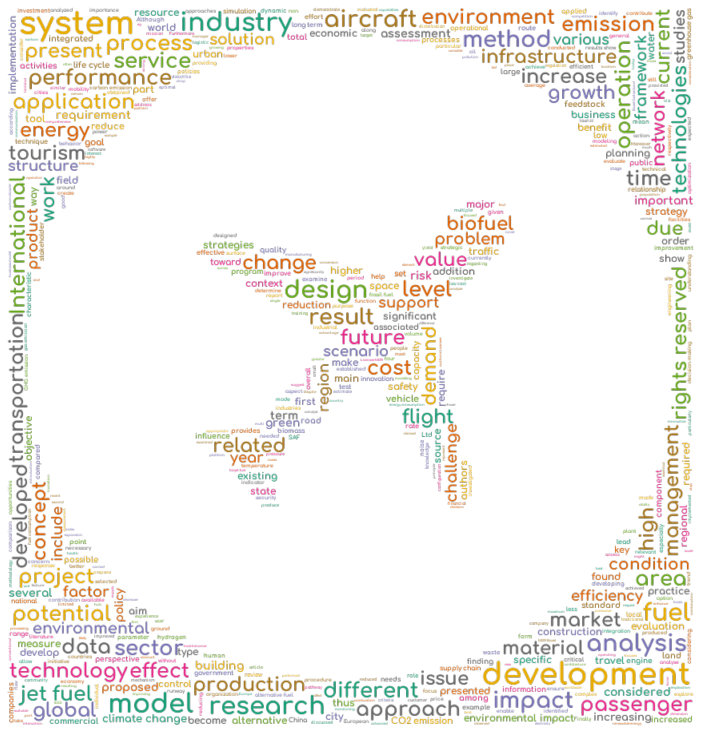

<Figure size 432x288 with 0 Axes>

In [15]:
mask      = np.array(Image.open(os.path.join(cwd,"ac.png")))
mask2     = np.where(mask==0, 255, mask)
font_path = os.path.join(cwd,"Comfortaa-Bold.ttf")



wc = WordCloud(font_path = font_path,
               stopwords = all_stopwords,
               mask = mask2, background_color = None,
               mode='RGBA',colormap='Dark2',
               max_words = 1000, max_font_size = 40,
               random_state = 42, width = mask.shape[1],
               height = mask.shape[0])

wc.generate(" ".join(text_filtered)) # We translate a list of strings into a single huge string
%matplotlib inline
plt.figure( figsize=(10,10), facecolor='w')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('wordcloud.png', dpi=600, format='png', metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

A good homework is to tamper with the mask so that we now create our wordcloud only in the original black circle (basically, the complementary version of this wordcloud). In the following, we now focos on the nalysis of the original dataset we used. For example, we might be interested in the most common words (the fontsize in the wordcloud should already help)

In [16]:
popular_words[0:20]

['fuel',
 'development',
 'environmental',
 'emissions',
 'energy',
 'aircraft',
 'system',
 'research',
 'industry',
 'analysis',
 'model',
 'design',
 'fuels',
 'results',
 'performance',
 'management',
 'impact',
 'economic',
 'production',
 'process']

We now define a few colors and font specs for plotting purposes

In [17]:
# DATA FOR PLOTTING

color1 = (255.0/255,179.0/255,25.0/255)
color2 =(102.0/255,178.0/255,255.0/255)
color3 =(255.0/255,255.0/255,51.0/255)
color4 =(153.0/255,0.0/255,0.0/255)
color5 =(0.0/255,0.0/255,153.0/255)
color6 =(0.0/255,51.0/255,25.0/255)
color7 =(128.0/255,191.0/255,255.0/255)

colors = [color1,
          color2,
          color3,
          color4,
          color5,
          color6,
          color7]

axis_font  = {'fontname':'Arial', 'size':'15'}
xtick_font = {'fontname':'Arial', 'size':'8'}

We start with the evolution of papers dealing with sustainability in aviation over the years

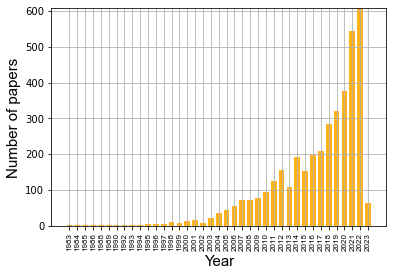

In [18]:
df_scopus_year = pd.read_csv(os.path.join(cwd,'Scopus-10-Analyze-Year.csv'),sep=',',
                                    index_col=False, skiprows = 7)
df_scopus_year.rename(columns = {'Unnamed: 1':'Count'}, inplace = True)
df_scopus_year_srt = df_scopus_year.sort_values(by=['YEAR'])

fig,ax = plt.subplots()
ax.bar(np.linspace(0,4*len(df_scopus_year_srt['YEAR']),len(df_scopus_year_srt['YEAR'])),df_scopus_year_srt['Count'], 
        width=3, color=color1)
ax.set_xlabel('Year',**axis_font)
ax.set_ylabel('Number of papers',**axis_font)
plt.xticks(np.linspace(0,4*len(df_scopus_year_srt['YEAR']),len(df_scopus_year_srt['YEAR'])),
            df_scopus_year_srt['YEAR'],rotation=90,**xtick_font)
ax.set_ylim([0,max(df_scopus_year_srt['Count'])])
ax.grid()
plt.show()  
fig.savefig('sust_papers_year.png', format='png', dpi=500,bbox_inches='tight', 
                transparent=False,
                pad_inches=0.1)

Quite an increase in papers from the late 2000s, not surprising!

Let us now focus on the document type, just for completeness

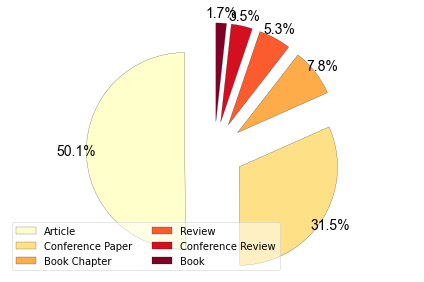

In [19]:
df_scopus_Doctype = pd.read_csv(os.path.join(cwd,'Scopus-10-Analyze-Doctype.csv'),sep=',',
                                    index_col=False, skiprows = 7)
df_scopus_Doctype.rename(columns = {'Unnamed: 1':'Count'}, inplace = True)

cmap   = cm.get_cmap('YlOrRd')
colors = [cmap(idx) for idx in np.linspace(0,1,len(df_scopus_Doctype))]

fig,ax  = plt.subplots()
expl_pct = 0.3
explode = [expl_pct for i in range(0,len(df_scopus_Doctype))]
plt.pie(df_scopus_Doctype['Count'], explode=explode, colors=colors[:len(df_scopus_Doctype)],
        autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'fontsize': 14,'fontname': 'Arial'},
        wedgeprops={'edgecolor':'k','linewidth': 0.2, 'linestyle': '-', 'antialiased': True},
        pctdistance=1.1, labeldistance=1.1)
ax.axis('equal')
plt.legend(labels=df_scopus_Doctype['DOCUMENT TYPE'],ncol=2,
            loc='best', fancybox=True, framealpha=0.5)
plt.tight_layout()
plt.show()
fig.savefig('sust_papers_doctype.png', format='png', dpi=500,bbox_inches='tight', 
                transparent=False,
                pad_inches=0.1)

Roughly 50% of the papers we are using are journal papers

Finally, let us check which academic institutions are the most active (we plot teh top-20)

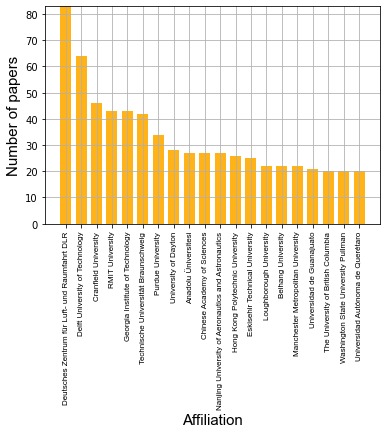

In [20]:
df_scopus_affiliation = pd.read_csv(os.path.join(cwd,'Scopus-10-Analyze-Affiliation.csv'),sep=',',
                                    index_col=False, skiprows = 7)
df_scopus_affiliation.rename(columns = {'Unnamed: 1':'Count'}, inplace = True)

max_affil = 20
df_scopus_affiliation = df_scopus_affiliation[:max_affil]
fig,ax = plt.subplots()
ax.bar(np.linspace(0,4*len(df_scopus_affiliation['AFFILIATION']),len(df_scopus_affiliation['AFFILIATION'])),df_scopus_affiliation['Count'], 
        width=3, color=color1)
ax.set_xlabel('Affiliation',**axis_font)
ax.set_ylabel('Number of papers',**axis_font)
plt.xticks(np.linspace(0,4*len(df_scopus_affiliation['AFFILIATION']),len(df_scopus_affiliation['AFFILIATION'])),
            df_scopus_affiliation['AFFILIATION'],rotation=90,**xtick_font)
ax.set_ylim([0,max(df_scopus_affiliation['Count'])])
ax.grid()
plt.show()  
fig.savefig('sust_papers_affiliation.png', format='png', dpi=500,bbox_inches='tight', 
                transparent=False,
                pad_inches=0.1)

DLR (Germany) is the most active, followed by TU Delft (Netherlands) and Cranfield University (UK)

This concludes the mini-tutorial on the ```wordcloud``` package. As mentioned in the introduction, for comments, questions, or remarks, please reach out at a.bombelli@tudelft.nl